In [ ]:
#Got the dataset from UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
import pandas as pd
df = pd.read_csv(url)

####Displaying the first 5 rows of data

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


The Fine Fuel Moisture Code (FFMC) represents fuel moisture of forest litter fuels under the shade of a forest canopy.

The Duff Moisture Code (DMC) represents fuel moisture of decomposed organic material underneath the litter.

The Drought Code (DC), much like the Keetch-Byrum Drought Index, represents drying deep into the soil. It approximates moisture conditions for the equivalent of 53-day (1272 hour) timelag fuels.

The Initial Spread Index (ISI) is analogous to the NFDRS Spread Component (SC). It integrates fuel moisture for fine dead fuels and surface windspeed to estimate a spread potential. ISI is a key input for fire behavior predictions.

Relative humidity (RH) is the ratio of the amount of moisture in the air to the amount of moisture necessary to saturate the air at the same temperature and pressure. When the RH drops, fire behavior increases because these fine fuels become drier.

####Getting the Data's Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


This dataset has no null values.
The dataset uses integers, floats, and objects as data types

####A Description of the Data

In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


The mean and median are pretty close, but not the same, except in the area and DC.

Most of the days did not have rain, and when it did, it did not rain a lot.

The mean and median areas are a lot lower than the max area value, so most of the values are probably small

##Histograms

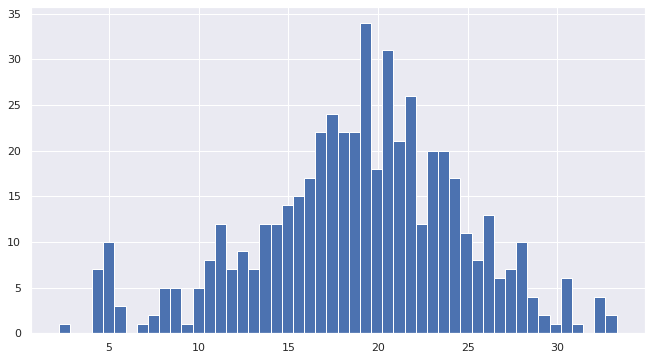

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(11,6))
plt.hist(df['temp'], bins=50)
plt.show()

In this histogram, we can see that the temperature varies quite a bit, but the majority of the temperatures were around the middle, 20 degrees, whcih the highest is around 30 degrees

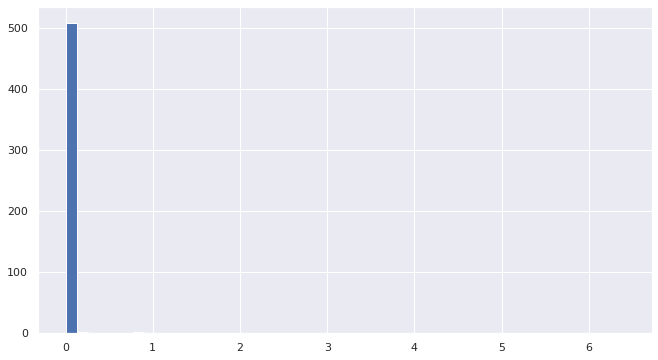

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(11,6))
plt.hist(df['rain'], bins=50)
plt.show()

This histogram shows that rain was close to 0 on all the days with fires

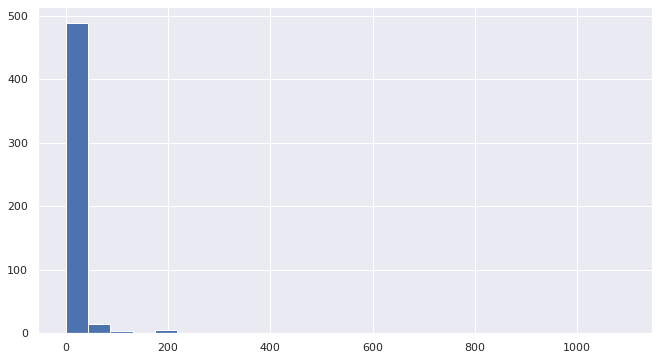

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(11,6))
plt.hist(df['area'], bins=25)
plt.show()

This histogram shows that a majority of the areas for the fires were small

##Scatter Plots

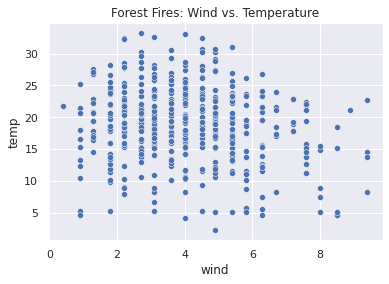

In [ ]:
# Import matplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#plt.figure(figsize=(13,6))

class_dict = {"Wind" : "#9b59b6", "Temperature" : "#3498db"}

sns.scatterplot(x = df['wind'], y = df['temp'])

title = 'Forest Fires: Wind vs. Temperature'
plt.title(title)

plt.show()

##Text_to_Numerical

In [ ]:
dummy_df = pd.get_dummies(df)
dummy_df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_small = df.groupby('month').agg('mean')
df_small

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
month,,,,,,,,,,,
apr,5.777778,4.222222,85.788889,15.911111,48.555556,5.377778,12.044444,46.888889,4.666667,0.000000,8.891111
aug,4.483696,4.282609,92.336957,153.732609,641.077717,11.072283,21.631522,45.489130,4.086413,0.058696,12.489076
dec,4.555556,5.000000,84.966667,26.122222,351.244444,3.466667,4.522222,38.444444,7.644444,0.000000,13.330000
feb,5.150000,4.400000,82.905000,9.475000,54.670000,3.350000,9.635000,55.700000,3.755000,0.000000,6.275000
jan,3.000000,4.500000,50.400000,2.400000,90.350000,1.450000,5.250000,89.000000,2.000000,0.000000,0.000000
jul,5.218750,4.593750,91.328125,110.387500,450.603125,9.393750,22.109375,45.125000,3.734375,0.006250,14.369687
jun,6.294118,4.823529,89.429412,93.382353,297.705882,11.776471,20.494118,45.117647,4.135294,0.000000,5.841176
mar,4.722222,4.481481,89.444444,34.542593,75.942593,7.107407,13.083333,40.000000,4.968519,0.003704,4.356667
may,5.000000,4.000000,87.350000,26.700000,93.750000,4.600000,14.650000,67.000000,4.450000,0.000000,19.240000


##Bar Charts

<function matplotlib.pyplot.show>

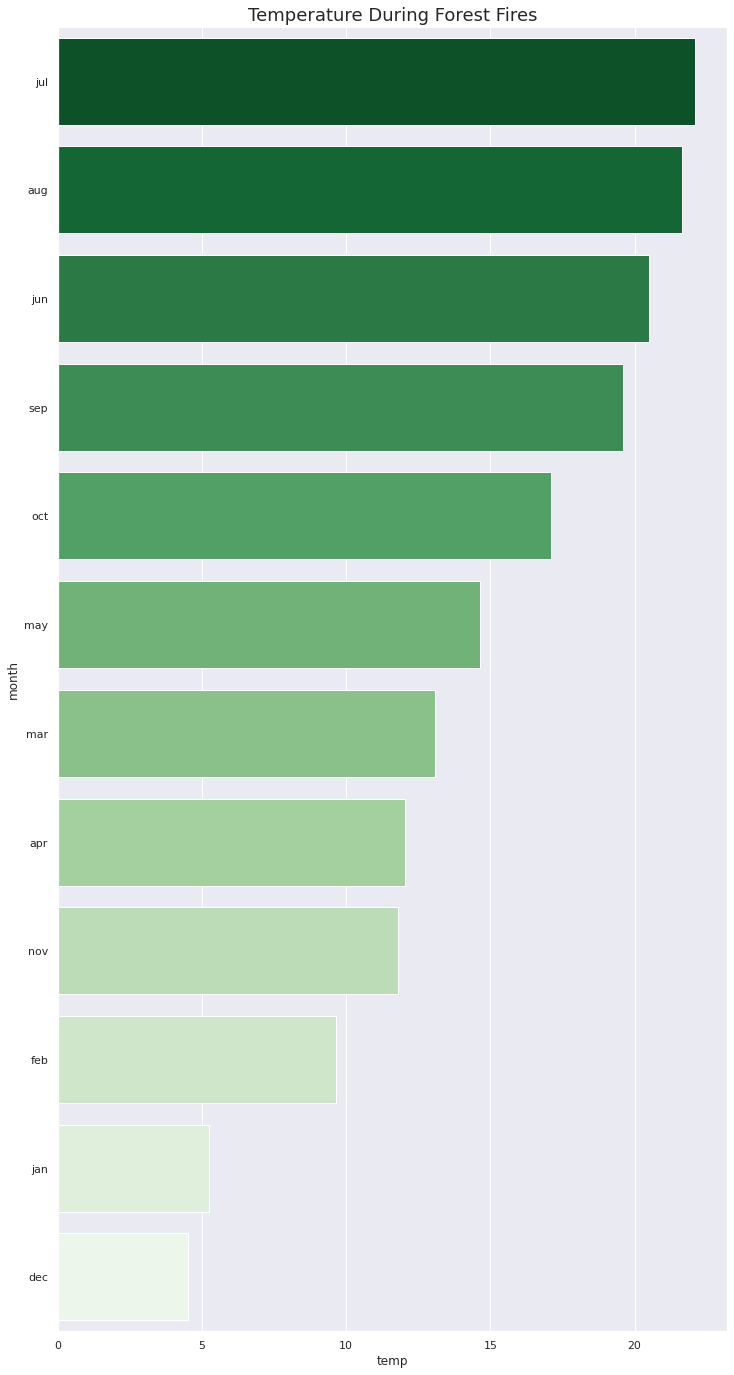

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df_vper = df_small.sort_values(by='temp', ascending=False)
y_vals = df_vper['temp']

#Set x_values as index
x_vals = df_vper.index.to_series()

#set bar plot with figsize
plt.figure(figsize=(12,24))
sns.barplot(x=y_vals, y=x_vals, palette='Greens_r')


title = 'Temperature During Forest Fires'
plt.title(title, size=18)
plt.savefig(title,dp1=250, bbox_inches='tight', pad_inches=0.8)
plt.show

The column is already at the end!

##Logistic Regression

In [ ]:
X = df_small.iloc[:, :-1]
y = df_small.iloc[:, -1]

In [ ]:
df_small.shape

(12, 11)

In [ ]:
X.shape

(517, 12)

In [ ]:
y.shape

(517,)

In [ ]:
y

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

###Building Linear Regression Model

In [ ]:
# 1. Import model
from sklearn.linear_model import LinearRegression

# 2. Initialize model
model = LinearRegression()
print(model)

# 3. Fit model
model.fit(X, y)

# 4. Score model
model.score(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


0.9697707875058197

In [ ]:
model.predict(X[:5])

array([ 5.83670265, 12.53947639, 13.45948875,  7.32476548, -0.13129607])

In [ ]:
y.head()

month
apr     8.891111
aug    12.489076
dec    13.330000
feb     6.275000
jan     0.000000
Name: area, dtype: float64

#Cross-Validation

We use cross validation for splitting into testing and training sets, and using both of them to try different things, and this is used to combat overfitting.

In [ ]:
# Import cross_val_score and classifiers
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def area_5(row):
  if row['area'] > 5:
    val = 1
  else:
    val = 0
  return val

In [ ]:
# Apply area_5 function to new column
df['area_5'] = df.apply(area_5, axis=1)

In [ ]:
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_5
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0


In [ ]:
df['area_5'].value_counts()

0    366
1    151
Name: area_5, dtype: int64

In [ ]:
# Split data into X and y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
# Function to show cross-validation
def cross_val(model):
  scores = cross_val_score(model, X, y, cv=10)
  print(scores)
  mean = scores.mean()
  print(mean)

In [ ]:
cross_val(DecisionTreeClassifier())

[nan nan nan nan nan nan nan nan nan nan]
nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'oct'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'mar'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'mar'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on thi

In [ ]:
cross_val(RandomForestClassifier())

[nan nan nan nan nan nan nan nan nan nan]
nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'oct'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'mar'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'mar'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on thi

In [ ]:
cross_val(XGBClassifier())

[nan nan nan nan nan nan nan nan nan nan]
nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields month, day

  FitFailedWarning)


In [ ]:
cross_val(XGBRFClassifier())

[nan nan nan nan nan nan nan nan nan nan]
nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields month, day

  FitFailedWarning)
